# Decision Tree Classifier

## Salaries Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [4]:
target = df['salary_more_then_100k']

### Converting Categorical Data into Numerical Values

In [5]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [6]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [7]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [8]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [9]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [10]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [12]:
model.score(inputs_n,target)

1.0

<b> Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [13]:
model.predict([[2,1,0]])

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

<b>Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [14]:
model.predict([[2,1,1]])

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

---

## Titanic Dataset

<b>In this file using following columns build a model to predict if person would survive or not.</br>
1-Pclass</br>
2-Sex</br>
3-Age</br>
4-Fare</br>
Calculate score of your model

In [15]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [18]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [19]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [20]:
inputs.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [21]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [22]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
model.score(X_test,y_test)

0.770949720670391

---

# Iris Dataset

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris=load_iris()

In [28]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
#input features
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
#output feature
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<b> Here we are getting target in a form of 0 and 1

## OR
## Data of Iris can be uploaded as:

In [31]:
import seaborn as sns
df=sns.load_dataset('iris')

<b> Here we are getting target in a form categorical variables. So, It will have to convert into numerical values

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
#independent and dependent features
X=df.iloc[:,:-1]
y=iris.target  #taking from above type (loaded by sklearn)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.33,random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier()
tr.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5013051688388626, 0.9761904761904762, 'X[1] <= 1.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.2087714751184834, 0.9285714285714286, 'X[2] <= 3.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.02843601895734597, 0.8809523809523809, 'X[3] <= 39.344\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.018957345971563982, 0.8333333333333334, 'X[3] <= 27.562\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.009478672985781991, 0.7857142857142857, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.02843601895734597, 0.7857142857142857, 'X[3] <= 30.256\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.018957345971563982, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.037914691943127965, 0.7380952380952381, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.037914691943127965, 0.8333333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.38910693127962087, 0.8809523809523809, 'X[3] <= 52.277\ngini = 0.278\ns

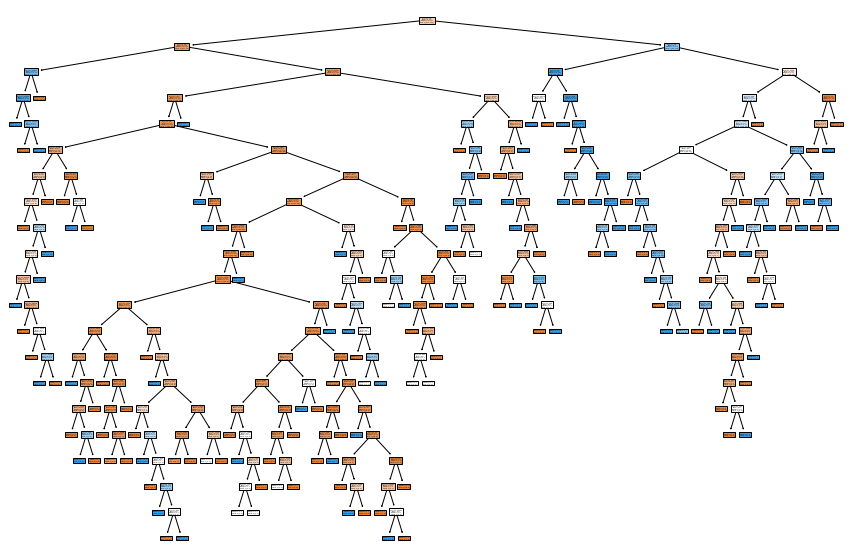

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(tr,filled=True)

In [38]:
y_pred=tr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [40]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7491525423728813


In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       183
           1       0.66      0.71      0.68       112

    accuracy                           0.75       295
   macro avg       0.73      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



## Post Prunning

In [42]:
tr1=DecisionTreeClassifier(max_depth=2)
tr1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
y_pred1=tr1.predict(X_test)

In [44]:
score=accuracy_score(y_pred1,y_test)
print(score)

0.7762711864406779


In [45]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       227
           1       0.51      0.90      0.65        68

    accuracy                           0.78       295
   macro avg       0.73      0.82      0.74       295
weighted avg       0.86      0.78      0.79       295



<b> Thus, it shows after post prunning, results have improved

In [46]:
from sklearn.model_selection import GridSearchCV

In [ ]:
DecisionTreeClassifier()

In [49]:
parameter={'criterion' : ["gini", "entropy"],'splitter' : ["best", "random"],'max_depth':[1,2,3,4,5]}
classifier_regressor=GridSearchCV(tr,param_grid=parameter,scoring='accuracy',cv=5)

In [50]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [51]:
print(classifier_regressor.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}


In [52]:
print(classifier_regressor.best_score_)

0.8104761904761905


In [53]:
y_pred=classifier_regressor.predict(X_test)

In [54]:
score=accuracy_score(y_pred,y_test)
print(score)

0.8169491525423729


In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       197
           1       0.68      0.84      0.75        98

    accuracy                           0.82       295
   macro avg       0.80      0.82      0.80       295
weighted avg       0.83      0.82      0.82       295

